# Loading in SCF weights

In [34]:
# All data (public)
# %load_ext autoreload
# %autoreload 2

# import os
# import sys
# module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
# if module_path not in sys.path:
#     sys.path.append(module_path)

# from CustomModules import dataloading as DL

targetdir = '../data/extracted/'
targetSCFzip = targetdir + 'SCF2019_data_public_weights.zip'


    
import urllib.request
import zipfile
import pandas as pd
import re

def SCF2019_weights_load(targetzip, targetdir):
    # Saves SCF2019 data as stata file

    # URL for SCF 2019 Stata Zip file using revised weights
    url = 'https://www.federalreserve.gov/econres/files/scf2019rw1s.zip'

    # Saving Zip file
    urllib.request.urlretrieve(url, targetzip)

    # Unzipping file
    with zipfile.ZipFile(targetzip, 'r') as zip_ref:
        zip_ref.extractall(targetdir)
        # Get list of files names in zip
        files = zip_ref.namelist()
        
    # Return list of locations of extracted files   
    SCF_file_locs = [] 
    for file in files:
        SCF_file_locs.append(targetdir + file)
    
    return SCF_file_locs



In [36]:
import pandas as pd
# TargetData = ['yy1', 'X3014']
SCF_weights_locs = SCF2019_weights_load(targetSCFzip, targetdir)
SCF2019_weights = pd.read_stata(
    SCF_weights_locs[0])

SCF2019_weights.head()

,y1,wt1b1,wt1b2,wt1b3,wt1b4,wt1b5,wt1b6,wt1b7,wt1b8,wt1b9,...,mm9,mm8,mm7,mm6,mm5,mm4,mm3,mm2,mm1,yy1
0,11,NaN,29599.030202,29727.682668,31275.299488,27540.766998,NaN,34085.608919,32417.053325,34198.901261,...,1.0,1.0,1.0,NaN,1.0,1.0,1.0,2.0,NaN,1
1,21,19206.370352,18089.529097,17755.428411,19192.712982,16940.752525,17737.840965,17941.232971,19235.169652,19566.815245,...,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2
2,31,20051.581988,19518.380070,20781.293110,22665.127465,NaN,19130.318676,NaN,NaN,21044.301044,...,1.0,NaN,NaN,1.0,NaN,1.0,2.0,1.0,2.0,3
3,41,NaN,31501.223617,28036.170498,NaN,36656.415679,31247.296834,33921.879074,NaN,29947.784707,...,1.0,NaN,2.0,1.0,1.0,NaN,2.0,2.0,NaN,4
4,51,NaN,19300.740652,21159.725013,20941.000986,19862.420031,18604.182200,21379.224354,21687.508414,22793.878996,...,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,NaN,5


>For each survey case and each replicate, the file contains a weight
(WT1B1-WT1B999) and the number of times the case was selected in the
replicate (MM1-MM999).  We computed weights for each replicate using
exactly the same procedures we used for the main weights.  Replicate
weights were computed only for the first implicate of each case.  For
many purposes, users of the replicate weight files will probably want
to multiply the weight times the multiplicity: in all cases the sum of
each of the weights times the corresponding multiplicities of the
cases equals the total number of households.  To estimate the sampling
variance of the mean of family income, for example, a user would
estimate the mean 999 times using the replicate weights and compute
the standard error of that estimate.  An estimate of the total
standard error attributable to imputation and sampling is given by
SQRT((6/5)*imputation variance + sampling variance).

# Loading in Summary SCF data

In [17]:
# Summary Data

import pandas as pd

df = pd.read_csv('../data/SCFP2019.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28885 entries, 0 to 28884
Columns: 351 entries, YY1 to NINCQRTCAT
dtypes: float64(74), int64(277)
memory usage: 77.4 MB


In [18]:
# Variable maps

df_map = pd.read_csv('../data/2019map.txt', delimiter='\t')
df_map.columns = ['code', 'descrip', 'var3', 'var4']

In [15]:
df_map.head()

,code,descrip,var3,var4
0,J19,6.1,6,12
1,J100,6.1,6,18
2,J101,6.1,6,24
3,J102,6.1,6,30
4,J103,6.1,6,36


# Loading in main SCF data

In [46]:
targetdir = '../data/extracted/'
targetSCFzip = targetdir + 'SCF2019_data_public.zip'


    
import urllib.request
import zipfile
import pandas as pd
import re

def SCF2019_load_stata(targetzip, targetdir,series):
    # Saves SCF2019 data as stata file

    # URL for SCF 2019 Stata Zip file of main data
    url = 'https://www.federalreserve.gov/econres/files/scf2019s.zip'

    # Saving Zip file
    urllib.request.urlretrieve(url, targetzip)

    # Unzipping file
    with zipfile.ZipFile(targetzip, 'r') as zip_ref:
        zip_ref.extractall(targetdir)
        # Get list of files names in zip
        files = zip_ref.namelist()
        
    # Return list of locations of extracted files   
    SCF_file_locs = [] 
    for file in files:
        SCF_file_locs.append(targetdir + file)
        
    # Read into pandas df    
    SCF2019_data = pd.read_stata(
        SCF_file_locs[0],
        columns=series)
    
    return SCF2019_data





(28885, 5333)

In [50]:
TargetData = ['yy1', 'x42001', 'x3014', 'x7556', 'x7557', 'x5931', 'x7004']
SCF2019_data = SCF2019_load_stata(targetSCFzip, targetdir, TargetData)


SCF2019_data.shape

(28885, 7)

In [51]:
SCF2019_data.head()

,yy1,x42001,x3014,x7556,x7557,x5931,x7004
0,1,30598.896539,3,6,1,12,5
1,1,23561.874562,3,6,1,12,5
2,1,25726.122276,3,6,1,12,5
3,1,26488.317060,3,6,1,12,5
4,1,23809.061856,3,6,1,12,5


# SCF Variables

- YY1 is household ID

- X42001 is used for weighting (relatively wealthy families are oversampled); 

- X3014 "how mufch financial risk willing to take?" (4 cats)
- X7556 knowledge of personal finance
- X7557 willingness to take financial risks (10/11 cats)

- X5931 education of reference person

- X7004 Hispanic or Latino?

- X6809-814 Race likely 6809 only relevant
- X5931 Reference person education
- X4513 number of full-time employers in last year
- X4512 number of years employed full-time
- X7406 industry census codes (2010) but collapsed into 7 categories
- X7405 occ. census codes (2010) but collapsed into 6 categories

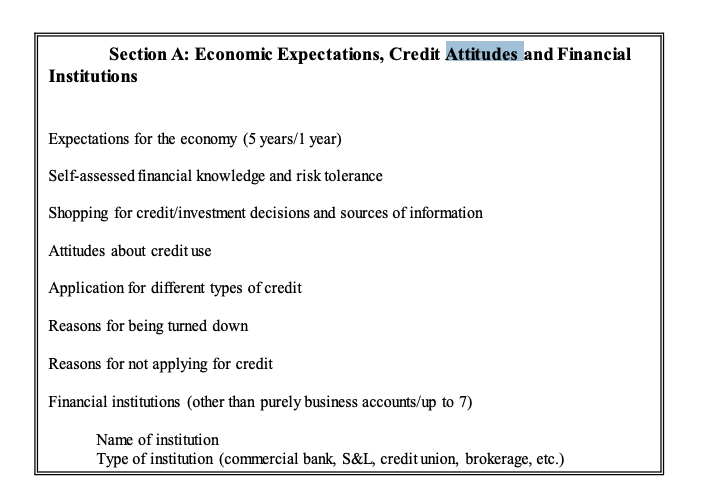

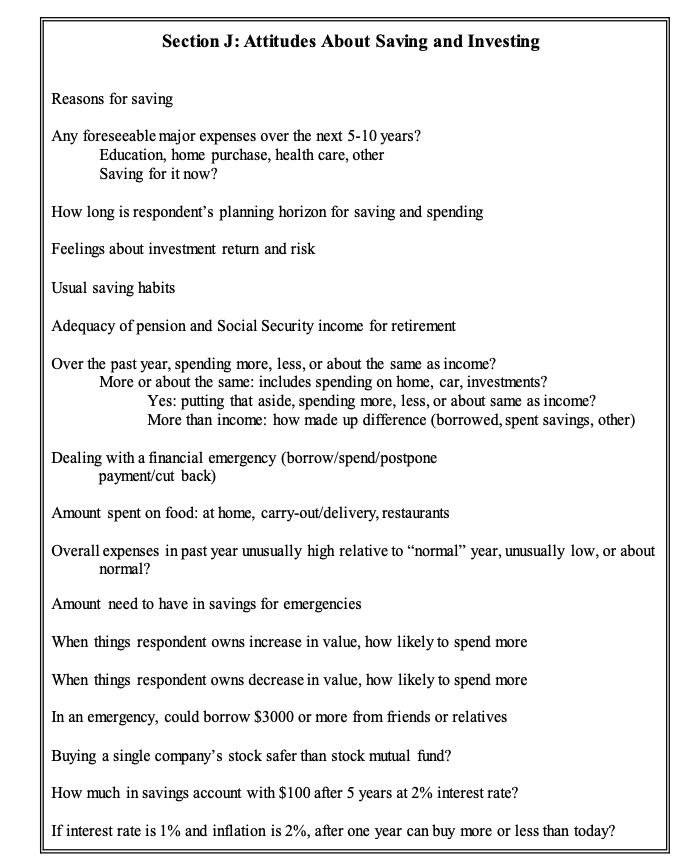

# DOL UI Data

[ETA 203](https://oui.doleta.gov/unemploy/DataDownloads.asp) contains demographic data for those UI

In [48]:
targetdir = '../data/extracted/'
targetUIcsv = targetdir + 'UI_data.csv'

import urllib.request
import pandas as pd

def UI_demo_data_to_df(targetcsv, targetdir):
    # Saves UI demographic data from DOL as df

    # URL for UI demographic data
    url = 'https://oui.doleta.gov/unemploy/csv/ar203.csv'

    # Saving csv
    urllib.request.urlretrieve(url, targetcsv)
    
    # Read in as pandas df
    df = pd.read_csv(targetcsv)
    
    # Convert dates into datetime objs
    df['rptdate'] = pd.to_datetime(df['rptdate'])
    
    df
    
    return df

UI_demo_data_to_df(targetUIcsv, targetdir).head()

,st,rptdate,c1,c2,c3,c4,c12,c13,c14,c15,...,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93
0,AK,1994-08-31,P,4388,4554,0,343,527,2697,2907,...,0,0,0,0,0,0,0,0,0,0
1,AK,1994-09-30,P,4523,4187,0,325,541,2718,2796,...,0,0,0,0,0,0,0,0,0,0
2,AK,1994-10-31,P,5456,4388,0,309,636,3109,3201,...,0,0,0,0,0,0,0,0,0,0
3,AK,1994-11-30,P,7869,5094,0,451,834,4174,4196,...,0,0,0,0,0,0,0,0,0,0
4,AK,1994-12-31,P,8945,4602,0,502,838,4264,4382,...,0,0,0,0,0,0,0,0,0,0


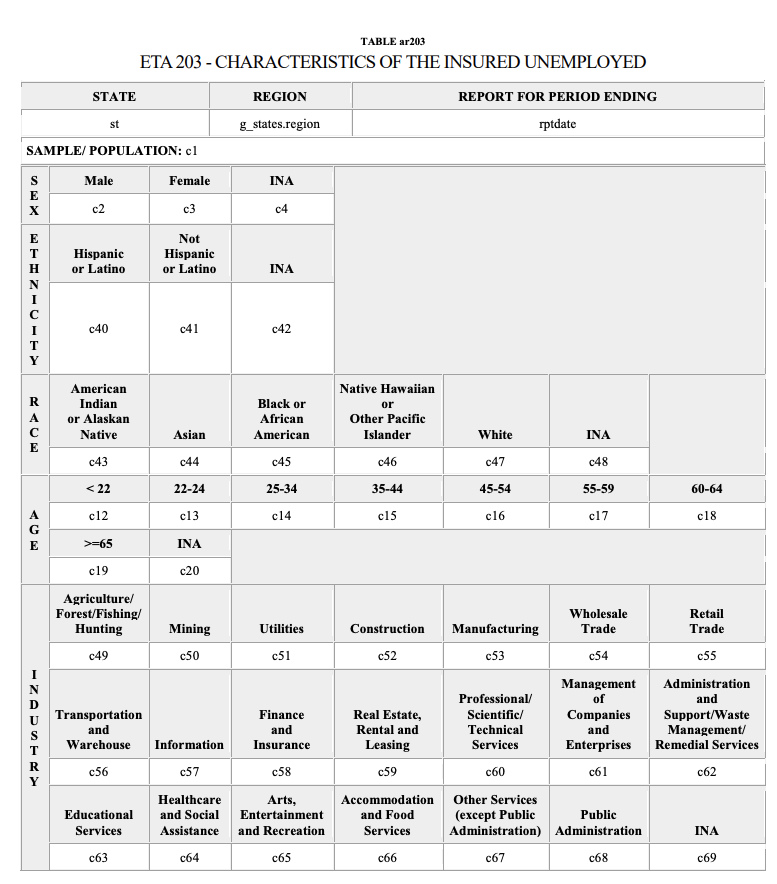

Target will likely be April 2020

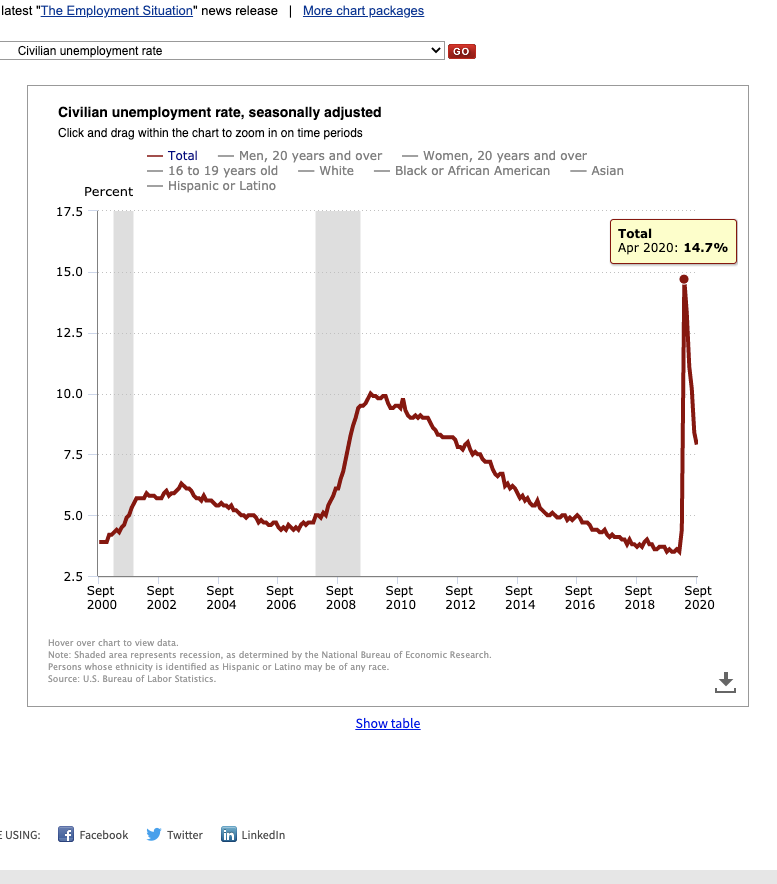

# Census Population Survey Apr 2020

In [15]:
targetdir = '../data/extracted/'
targetCPSzip = targetdir + 'CPS-Apr-2020.zip'
series = ['HRHHID', 'HRMONTH', 'HRYEAR4', 'HUFINAL', 'HEFAMINC', 'HWHHWGT', 'PEHSPNON']
import zipfile
import re
import urllib.request
import pandas as pd

def CPS_Apr2020(targetzip, targetdir, series):
    # Saves CPS Apr 2020 data

    # URL for CPS Apr 2020 survey
    url = 'https://www2.census.gov/programs-surveys/cps/datasets/2020/basic/apr20pub.zip'

    # Saving Zip file
    urllib.request.urlretrieve(url, targetzip)

    # Unzipping file
    with zipfile.ZipFile(targetzip, 'r') as zip_ref:
        zip_ref.extractall(targetdir)
        # Get list of files names in zip
        files = zip_ref.namelist()
        
    # Return list of locations of extracted files   
    SCF_file_locs = [] 
    for file in files:
        SCF_file_locs.append(targetdir + file)
    
    # Data dictionary 
    dd_file = '../data/2020_Basic_CPS_Public_Use_Record_Layout_plus_IO_Code_list.txt'
    dd_full = open(dd_file, 'r', encoding='iso-8859-1').read()


    # Regular expression finds rows with variable location details
    p = re.compile('\n(\w+)\s+(\d+)\s+(.*?)\t+.*?(\d\d*).*?(\d\d+)')

    # Keep adjusted results for series of interest
    dd_sel_var = [(i[0], int(i[3])-1, int(i[4])) 
                  for i in p.findall(dd_full) if i[0] in series]

    # Convert raw data into a list of tuples
    data = [tuple(int(line[i[1]:i[2]]) for i in dd_sel_var) 
            for line in open(SCF_file_locs[0], 'rb')]

    # Convert to pandas dataframe, add variable ids as heading
    CPS_df = pd.DataFrame(data, columns=[v[0] for v in dd_sel_var])
    
    
    return CPS_df

CPS_df = CPS_Apr2020(targetCPSzip, targetdir, series)

CPS_df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129382 entries, 0 to 129381
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   HRHHID    129382 non-null  int64
 1   HRMONTH   129382 non-null  int64
 2   HRYEAR4   129382 non-null  int64
 3   HUFINAL   129382 non-null  int64
 4   HEFAMINC  129382 non-null  int64
 5   HWHHWGT   129382 non-null  int64
 6   PEHSPNON  129382 non-null  int64
dtypes: int64(7)
memory usage: 6.9 MB


HUFINAL needs to be 201 or 001\ for complete interview, either CATI or CAPI
HEFAMINC is in categores up to 150k per year
HWHHWGT is household weight
PEHSPNON is HISPANIC yes/no
